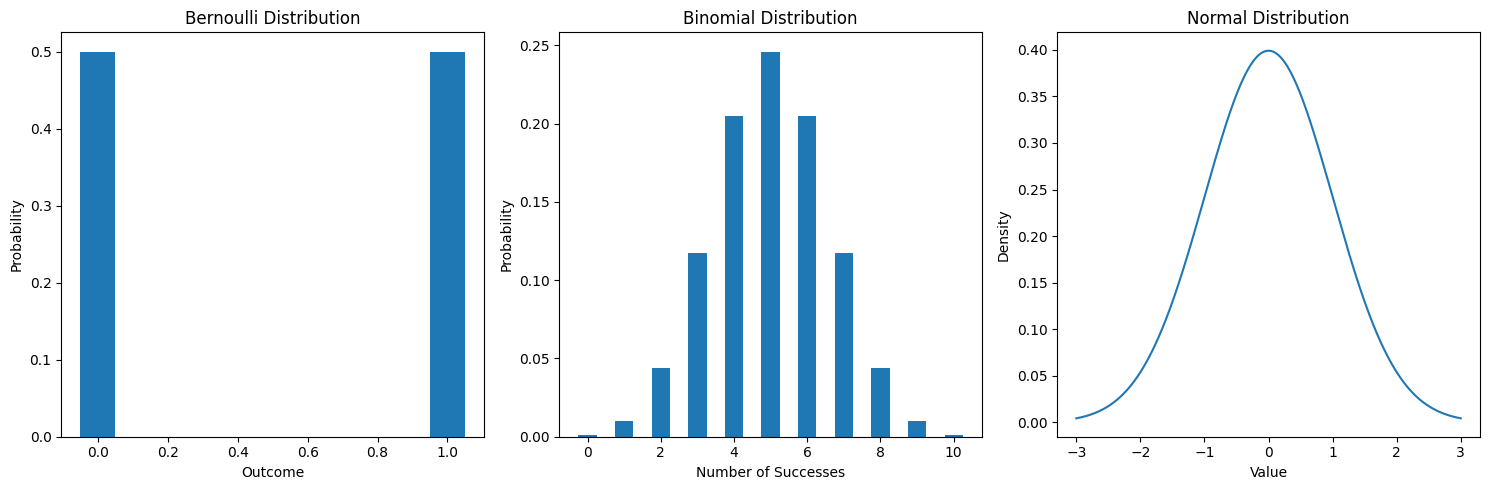

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom, norm

# Bernoulli Distribution
p = 0.5
bern = bernoulli(p)
x_bern = [0, 1]
y_bern = bern.pmf(x_bern)

# Binomial Distribution
n = 10
p = 0.5
binom_dist = binom(n, p)
x_binom = np.arange(0, n+1)
y_binom = binom_dist.pmf(x_binom)

# Normal Distribution
mu = 0
sigma = 1
x_norm = np.linspace(-3, 3, 1000)
y_norm = norm.pdf(x_norm, mu, sigma)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bernoulli Plot
axs[0].bar(x_bern, y_bern, width=0.1)
axs[0].set_title('Bernoulli Distribution')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Probability')

# Binomial Plot
axs[1].bar(x_binom, y_binom, width=0.5)
axs[1].set_title('Binomial Distribution')
axs[1].set_xlabel('Number of Successes')
axs[1].set_ylabel('Probability')

# Normal Plot
axs[2].plot(x_norm, y_norm)
axs[2].set_title('Normal Distribution')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


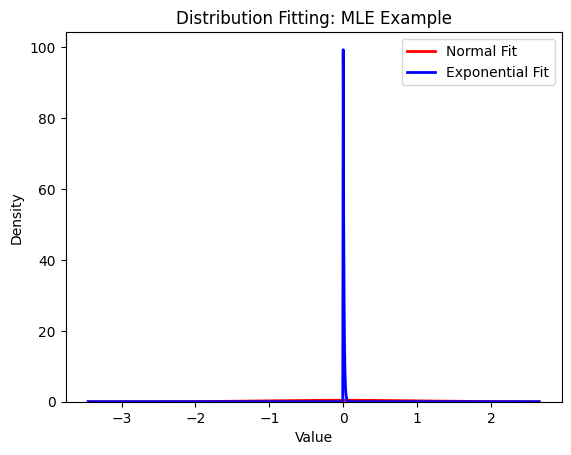

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon

# Sample Data
data = np.random.normal(0, 1, 1000)

# Fit Distributions
mu_norm, sigma_norm = norm.fit(data)
lambda_expon = 1 / np.mean(data)

# Plot Data Histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot Normal Fit
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, norm.pdf(x, mu_norm, sigma_norm), 'r-', lw=2, label='Normal Fit')

# Plot Exponential Fit
plt.plot(x, expon.pdf(x, scale=1/lambda_expon), 'b-', lw=2, label='Exponential Fit')

plt.legend()
plt.title('Distribution Fitting: MLE Example')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


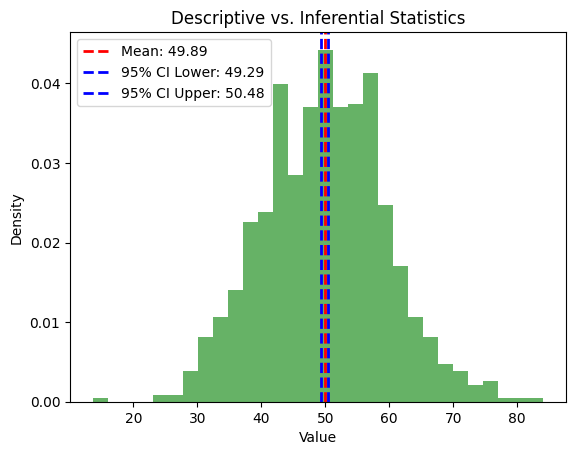

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Sample Data
data = np.random.normal(50, 10, 1000)

# Descriptive Statistics
mean = np.mean(data)
std_dev = np.std(data)

# Inferential Statistics: Confidence Interval
conf_int = stats.norm.interval(0.95, loc=mean, scale=std_dev/np.sqrt(len(data)))

# Plot Histogram
plt.hist(data, bins=30, alpha=0.6, color='g', density=True)

# Plot Mean and Confidence Interval
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(conf_int[0], color='b', linestyle='dashed', linewidth=2, label=f'95% CI Lower: {conf_int[0]:.2f}')
plt.axvline(conf_int[1], color='b', linestyle='dashed', linewidth=2, label=f'95% CI Upper: {conf_int[1]:.2f}')

plt.legend()
plt.title('Descriptive vs. Inferential Statistics')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


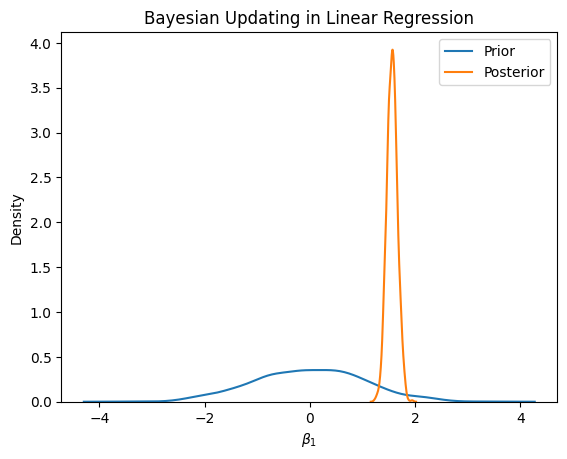

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prior distribution for beta_1
beta_prior = np.random.normal(0, 1, 1000)

# Simulate some data
np.random.seed(42)
X = np.random.rand(100)
Y = 2 * X + np.random.randn(100)

# Posterior distribution for beta_1 after observing data
beta_posterior = np.random.normal(np.cov(X, Y)[0, 1] / np.var(X), 0.1, 1000)

# Plot prior and posterior
sns.kdeplot(beta_prior, label='Prior')
sns.kdeplot(beta_posterior, label='Posterior')
plt.title('Bayesian Updating in Linear Regression')
plt.xlabel(r'$\beta_1$')
plt.ylabel('Density')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


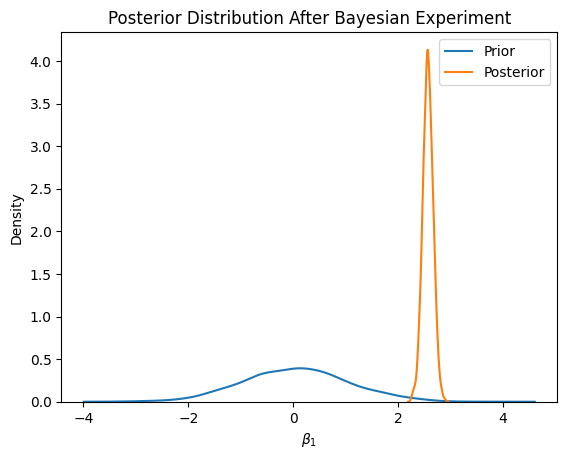

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data
np.random.seed(42)
X = np.random.rand(100)
Y = 3 * X + np.random.randn(100)

# Prior distribution for beta_1
beta_prior = np.random.normal(0, 1, 1000)

# Posterior distribution after observing data
beta_posterior = np.random.normal(np.cov(X, Y)[0, 1] / np.var(X), 0.1, 1000)

# Plot prior and posterior distributions
sns.kdeplot(beta_prior, label='Prior')
sns.kdeplot(beta_posterior, label='Posterior')
plt.title('Posterior Distribution After Bayesian Experiment')
plt.xlabel(r'$\beta_1$')
plt.ylabel('Density')
plt.legend()
plt.show()


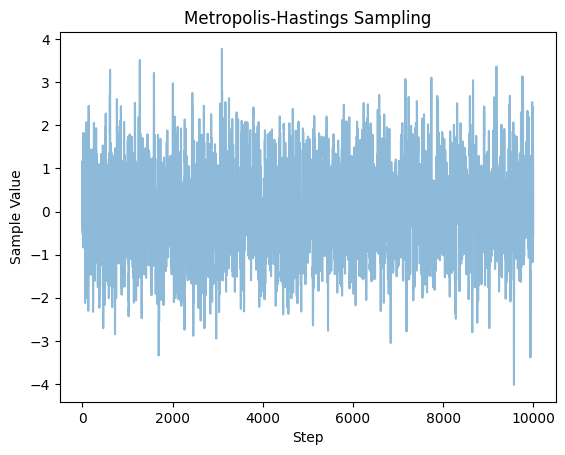

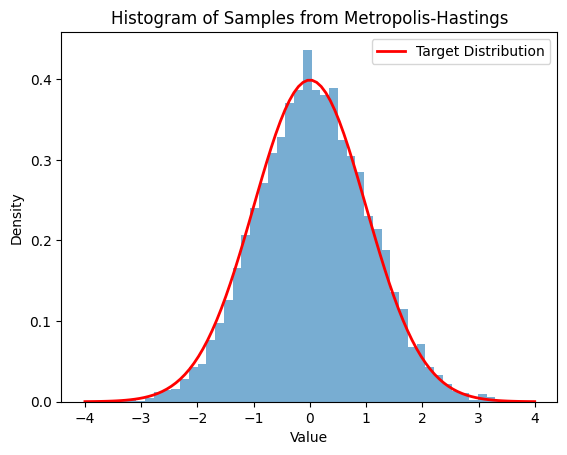

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (Normal distribution)
def target_distribution(x):
    return np.exp(-x**2 / 2)

# Metropolis-Hastings algorithm
def metropolis_hastings(target_dist, steps=10000):
    x = 0
    samples = []
    for _ in range(steps):
        x_new = x + np.random.normal(0, 1)
        accept_ratio = target_dist(x_new) / target_dist(x)
        if np.random.rand() < accept_ratio:
            x = x_new
        samples.append(x)
    return np.array(samples)

samples = metropolis_hastings(target_distribution)

# Plot the results
plt.plot(samples, alpha=0.5)
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('Step')
plt.ylabel('Sample Value')
plt.show()

plt.hist(samples, bins=50, density=True, alpha=0.6)
x = np.linspace(-4, 4, 100)
plt.plot(x, target_distribution(x) / np.sqrt(2 * np.pi), 'r-', lw=2, label='Target Distribution')
plt.title('Histogram of Samples from Metropolis-Hastings')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


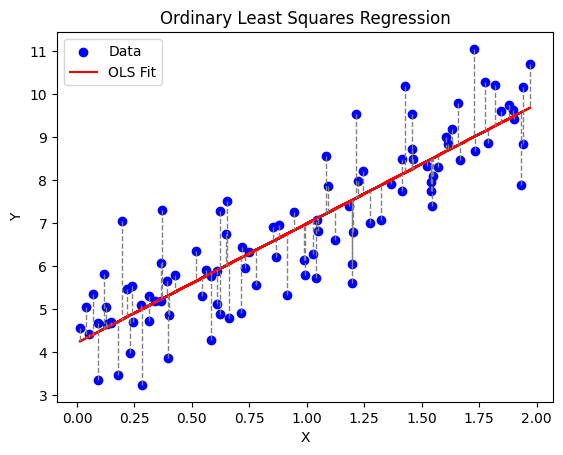

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# Fit OLS model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Plot data and regression line
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred, color='red', label='OLS Fit')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], color='gray', linestyle='--', linewidth=1)
plt.title('Ordinary Least Squares Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
